In [574]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mda

import string

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oykuk\anaconda3\lib\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Please click here to see / unsee the code."></form>''')

In [575]:
# Reading the data
data = pd.read_csv('data/speed_dating.csv', encoding='ISO-8859-1')
data.shape

(8378, 195)

In [576]:
data.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

1. Dropping columns
2. Changing dtypes to numeric
3. Then use Sklearn model to fill an values

In [577]:
pd.set_option('display.max_rows', None)
print(data.dtypes)

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [578]:
obj_cols = data.select_dtypes(include='object').columns
print(obj_cols)

Index(['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income',
       'career'],
      dtype='object')


In [579]:
#Filling field column, we have field_cd column that keeps numeric version of it.
#We will assign the empty ones 18 - Other and drop Field column

data['field_cd'].fillna(18, inplace=True)
data.drop('field', inplace=True, axis=1)
data['undergra'].fillna('other', inplace=True)

In [580]:
#Undergra column

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatiser = WordNetLemmatizer()
    regex_rule = r'[^\w\s]'
    
    preprocessed_text = []
    
    for e in text:
        e = re.sub(regex_rule, " ", e)
        tokens = word_tokenize(e)
    
        filtered_sentence = []
        for w in tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
    
        lemmas = [lemmatiser.lemmatize(token, pos='n').lower() for token in filtered_sentence]
        preprocessed_text.append(" ".join(lemmas))
    
    return preprocessed_text

data["undergra"] = data["undergra"].apply(preprocess_text)
data['tokenize_undergra'] = preprocess_data
data["tokenize_undergra"] = data["tokenize_undergra"].astype('category')
data["university"] = data["tokenize_undergra"].cat.codes
data.drop('tokenize_undergra',axis=1, inplace=True)
data.drop('undergra',axis=1, inplace=True)

In [581]:
vectoriser = TfidfVectorizer(analyzer=word_tokenize)
data_tfidf = vectoriser.fit_transform(preprocess_data)

In [582]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5,max_iter=50,doc_topic_prior=0.01,topic_word_prior=0.01)
lda = lda_model.fit(data_tfidf)
features_new = lda_model.transform(data_tfidf)

In [583]:
unique_values = np.unique(features_new)
num_unique_values = len(unique_values)
num_unique_values

413

In [584]:
log_likelihood_score = lda_model.score(data_tfidf)
perplexity_score = np.exp(-log_likelihood_score)
print(f"Perplexity score: {perplexity_score:.2f}")

Perplexity score: inf


In [585]:
features_new = pd.DataFrame(features_new)
data = pd.concat([data,features_new], axis=1)
data.drop('undergra',axis=1, inplace=True)

In [586]:
data.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr5_3  sinc5_3  intel5_3  fun5_3  amb5_3    0    1    2    3    4  
0      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  
1      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  
2      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  
3      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  
4      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  

[5 rows x 198 columns]

In [587]:
#Mnsat, tuition and income columns normally numeric values, we will change these columns

data['income'] = data['income'].str.replace(',', '')
data['income'] = pd.to_numeric(data['income'], errors='coerce')
data['mn_sat'] = pd.to_numeric(data['mn_sat'], errors='coerce')
data['tuition'] = pd.to_numeric(data['tuition'], errors='coerce')
data['zipcode'] = pd.to_numeric(data['zipcode'], errors='coerce')

In [588]:
data.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr5_3  sinc5_3  intel5_3  fun5_3  amb5_3    0    1    2    3    4  
0      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  
1      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  
2      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  
3      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  
4      NaN      NaN       NaN     NaN     NaN  0.2  0.2  0.2  0.2  0.2  

[5 rows x 198 columns]

In [589]:
all_na_rows = data[data.isna().all(axis=1)]
all_na_rows

Empty DataFrame
Columns: [iid, id, gender, idg, condtn, wave, round, position, positin1, order, partner, pid, match, int_corr, samerace, age_o, race_o, pf_o_att, pf_o_sin, pf_o_int, pf_o_fun, pf_o_amb, pf_o_sha, dec_o, attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o, like_o, prob_o, met_o, age, field_cd, mn_sat, tuition, race, imprace, imprelig, from, zipcode, income, goal, date, go_out, career, career_c, sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga, exphappy, expnum, attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1, attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1, attr2_1, sinc2_1, intel2_1, fun2_1, amb2_1, shar2_1, attr3_1, sinc3_1, fun3_1, intel3_1, amb3_1, attr5_1, sinc5_1, intel5_1, fun5_1, amb5_1, dec, attr, sinc, intel, fun, ...]
Index: []

[0 rows x 198 columns]

In [590]:
pd.set_option('display.max_rows', None)
null_counts = data.isnull().sum().sort_values(ascending=False)
print(null_counts[null_counts > 0])

tuition     8378
mn_sat      8350
zipcode     7962
num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
shar7_2     6404
attr7_2     6394
intel7_2    6394
fun7_2      6394
shar7_3     6362
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar2_3     6362
amb5_3      6362
sinc5_3     6362
intel5_3    6362
attr5_3     6362
fun5_3      6362
attr4_3     5419
sinc4_3     5419
shar4_3     5419
attr2_3     5419
sinc2_3     5419
intel2_3    5419
fun2_3      5419
amb4_3      5419
amb2_3      5419
fun4_3      5419
intel4_3    5419
them_cal    4404
sinc3_3     4404
you_call    4404
attr3_3     4404
date_3      4404
fun3_3      4404
amb3_3      4404
intel3_3    4404
attr1_3     4404
sinc1_3     4404
intel1_3    4404
fun1_3      4404
amb1_3      4404
shar1_3     4404
amb3_s      4378
attr3_s     4378
sinc3_s     4378
intel3_s    4378
fun3_s      4378
shar1_s     4282
amb1_s      4282
fun1_s      4282
intel1_s    4282
sinc1_s     42

In [591]:
pd.set_option('display.max_rows', None)

In [592]:
drop_list = ['attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3','attr7_3','sinc7_3','intel7_3','fun7_3','amb7_3','shar7_3','attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3','attr2_3',
             'sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3','attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3','attr5_3','sinc5_3','intel5_3','fun5_3','amb5_3','attr7_2','sinc7_2','intel7_2','fun7_2',
             'amb7_2','shar7_2','attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2','attr4_2','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2','attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2',
             'shar2_2','attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2','attr5_2','sinc5_2','intel5_2','fun5_2','amb5_2','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s',
             'attr3_s','sinc3_s','intel3_s','fun3_s',
             'amb3_s','attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','order','iid','id','idg','round',
             'position','positin1','partner','pid','int_corr','career','career_c','expnum',
             'you_call','them_cal','date_3','numdat_3','num_in_3','from','income'
            ]

def dropping(df,lst):
    for e in lst:
        df.drop(e, axis=1,inplace=True)
    return df

dropping(data,drop_list)


#Check these columns again, %15 is okay, we can create few diff dfs

gender  condtn  wave  match  samerace  age_o  race_o  pf_o_att  \
0          0       1     1      0         0   27.0     2.0     35.00   
1          0       1     1      0         0   22.0     2.0     60.00   
2          0       1     1      1         1   22.0     4.0     19.00   
3          0       1     1      1         0   23.0     2.0     30.00   
4          0       1     1      1         0   24.0     3.0     30.00   
5          0       1     1      0         0   25.0     2.0     50.00   
6          0       1     1      0         0   30.0     2.0     35.00   
7          0       1     1      0         0   27.0     2.0     33.33   
8          0       1     1      1         0   28.0     2.0     50.00   
9          0       1     1      0         0   24.0     2.0    100.00   
10         0       1     1      0         1   27.0     2.0     35.00   
11         0       1     1      0         1   22.0     2.0     60.00   
12         0       1     1      0         0   22.0     4.0     19.00   
13         0       1     1      1         1   23.0     2.0     30.00   
14         0       1     1      0         0   24.0     3.0     30.00   
15         0       1     1      0         1   25.0     2.0     50.00   
16         0       1     1      0         1   30.0     2.0     35.00   
17         0       1     1      0         1   27.0     2.0     33.33   
18         0       1     1      1         1   28.0     2.0     50.00   
19         0       1     1      0         1   24.0     2.0    100.00   
20         0       1     1      0         1   27.0     2.0     35.00   
21         0       1     1      0         1   22.0     2.0     60.00   
22         0       1     1      0         0   22.0     4.0     19.00   
23         0       1     1      0         1   23.0     2.0     30.00   
24         0       1     1      0         0   24.0     3.0     30.00   
25         0       1     1      0         1   25.0     2.0     50.00   
26         0       1     1      0         1   30.0     2.0     35.00   
27         0       1     1      0         1   27.0     2.0     33.33   
28         0       1     1      0         1   28.0     2.0     50.00   
29         0       1     1      0         1   24.0     2.0    100.00   
30         0       1     1      0         1   27.0     2.0     35.00   
31         0       1     1      0         1   22.0     2.0     60.00   
32         0       1     1      0         0   22.0     4.0     19.00   
33         0       1     1      1         1   23.0     2.0     30.00   
34         0       1     1      0         0   24.0     3.0     30.00   
35         0       1     1      0         1   25.0     2.0     50.00   
36         0       1     1      0         1   30.0     2.0     35.00   
37         0       1     1      0         1   27.0     2.0     33.33   
38         0       1     1      1         1   28.0     2.0     50.00   
39         0       1     1      0         1   24.0     2.0    100.00   
40         0       1     1      0         1   27.0     2.0     35.00   
41         0       1     1      0         1   22.0     2.0     60.00   
42         0       1     1      0         0   22.0     4.0     19.00   
43         0       1     1      1         1   23.0     2.0     30.00   
44         0       1     1      0         0   24.0     3.0     30.00   
45         0       1     1      0         1   25.0     2.0     50.00   
46         0       1     1      0         1   30.0     2.0     35.00   
47         0       1     1      0         1   27.0     2.0     33.33   
48         0       1     1      1         1   28.0     2.0     50.00   
49         0       1     1      0         1   24.0     2.0    100.00   
50         0       1     1      0         0   27.0     2.0     35.00   
51         0       1     1      0         0   22.0     2.0     60.00   
52         0       1     1      0         1   22.0     4.0     19.00   
53         0       1     1      1         0   23.0     2.0     30.00   
54         0       1     1      0         0   

In [593]:
data.columns

Index([  'gender',   'condtn',     'wave',    'match', 'samerace',    'age_o',
         'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha',    'dec_o',   'attr_o',   'sinc_o',  'intel_o',    'fun_o',
          'amb_o',   'shar_o',   'like_o',   'prob_o',    'met_o',      'age',
       'field_cd',   'mn_sat',  'tuition',     'race',  'imprace', 'imprelig',
        'zipcode',     'goal',     'date',   'go_out',   'sports', 'tvsports',
       'exercise',   'dining',  'museums',      'art',   'hiking',   'gaming',
       'clubbing',  'reading',       'tv',  'theater',   'movies', 'concerts',
          'music', 'shopping',     'yoga', 'exphappy',  'attr1_1',  'sinc1_1',
       'intel1_1',   'fun1_1',   'amb1_1',  'shar1_1',  'attr2_1',  'sinc2_1',
       'intel2_1',   'fun2_1',   'amb2_1',  'shar2_1',  'attr3_1',  'sinc3_1',
         'fun3_1', 'intel3_1',   'amb3_1',  'attr5_1',  'sinc5_1', 'intel5_1',
         'fun5_1',   'amb5_1',      'dec',     'attr

In [594]:
scaler = MinMaxScaler()

scaler_list = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1','attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1',
              'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1']

def scalling(lst,df):
    for e in lst:
        e_standardized = scaler.fit_transform(df[e].values.reshape(-1, 1))
        df[e] = e_standardized
        
scalling(lst=scaler_list, df=data)     

In [595]:
regs = [BayesianRidge(),KNeighborsRegressor(),LinearRegression(),RandomForestRegressor()]
data = data.dropna(axis=1, how='all')

def generating_new_df(df):
    df_complete = data.dropna()
    df_missing = df_complete.copy()
    for col in df_missing.columns:
        df_missing.loc[df_missing.sample(frac=0.1).index, col] = np.nan
    return df_complete, df_missing

# try only with columns that have missing values
# different estimators, explain imputers
# we can try with different versions

In [596]:
df_complete

gender  condtn  wave  match  samerace  age_o  race_o  pf_o_att  \
5664       1       2    14      0         0   23.0     4.0      20.0   
5667       1       2    14      0         0   26.0     3.0      15.0   
5668       1       2    14      0         1   24.0     2.0      10.0   
5670       1       2    14      0         0   26.0     1.0      30.0   
5671       1       2    14      0         0   21.0     4.0      15.0   
5673       1       2    14      0         1   31.0     2.0      12.0   
5674       1       2    14      1         0   35.0     4.0      15.0   
5675       1       2    14      0         0   29.0     6.0      20.0   
5677       1       2    14      0         1   22.0     2.0      20.0   
5678       1       2    14      0         1   24.0     2.0      50.0   
5680       1       2    14      0         0   27.0     4.0      15.0   
5681       1       2    14      0         0   26.0     4.0      20.0   
5683       1       2    14      1         0   24.0     6.0      20.0   

      pf_o_sin  pf_o_int  ...  met  match_es  satis_2  length  numdat_2  \
5664      20.0      20.0  ...  0.0       6.0      4.0     3.0       2.0   
5667      15.0      15.0  ...  0.0       6.0      4.0     3.0       2.0   
5668      20.0      27.0  ...  0.0       6.0      4.0     3.0       2.0   
5670       5.0      10.0  ...  0.0       6.0      4.0     3.0       2.0   
5671      25.0      15.0  ...  0.0       6.0      4.0     3.0       2.0   
5673      25.0      25.0  ...  0.0       6.0      4.0     3.0       2.0   
5674      15.0      30.0  ...  0.0       6.0      4.0     3.0       2.0   
5675      20.0      20.0  ...  0.0       6.0      4.0     3.0       2.0   
5677      10.0      20.0  ...  0.0       6.0      4.0     3.0       2.0   
5678      20.0      10.0  ...  0.0       6.0      4.0     3.0       2.0   
5680      20.0      20.0  ...  0.0       6.0      4.0     3.0       2.0   
5681      10.0      25.0  ...  0.0       6.0      4.0     3.0       2.0   
5683      30.0      10.0  ...  0.0       6.0      4.0     3.0       2.0   

             0         1         2         3         4  
5664  0.007402  0.007402  0.007402  0.970393  0.007402  
5667  0.007402  0.007402  0.007402  0.970393  0.007402  
5668  0.007402  0.007402  0.007402  0.970393  0.007402  
5670  0.007402  0.007402  0.007402  0.970393  0.007402  
5671  0.007402  0.007402  0.007402  0.970393  0.007402  
5673  0.007402  0.007402  0.007402  0.970393  0.007402  
5674  0.007402  0.007402  0.007402  0.970393  0.007402  
5675  0.007402  0.007402  0.007402  0.970393  0.007402  
5677  0.007402  0.007402  0.007402  0.970393  0.007402  
5678  0.007402  0.007402  0.007402  0.970393  0.007402  
5680  0.007402  0.007402  0.007402  0.970393  0.007402  
5681  0.007402  0.007402  0.007402  0.970393  0.007402  
5683  0.007402  0.007402  0.007402  0.970393  0.007402  

[13 rows x 92 columns]

In [597]:
df_complete, df_missing = generating_new_df(data)

In [598]:
def imputing(df_missing,df_complete,est):
    for e in est:
        imputer = IterativeImputer(estimator=e, max_iter=10, random_state=42)
        imputer.fit(df_missing)        
        data_imputed = pd.DataFrame(imputer.transform(df_missing), columns=df_missing.columns)
        
        mae = mean_absolute_error(df_complete, data_imputed)
        rmse = mean_squared_error(df_complete, data_imputed, squared=False)
        r2 = r2_score(df_complete, data_imputed,)
        
        print(f'MAE for {e}: {mae:.2f}')
        print(f'RMSE for {e}: {rmse:.2f}')
        print(f'R2 for {e}: {r2:.2f}')

In [599]:
if df_missing.empty:
    print("DataFrame is empty")
else:
    print("DataFrame is not empty")

DataFrame is not empty


In [600]:
df_missing

gender  condtn  wave  match  samerace  age_o  race_o  pf_o_att  \
5664     1.0     2.0  14.0    NaN       0.0   23.0     4.0      20.0   
5667     1.0     2.0  14.0    0.0       0.0   26.0     3.0      15.0   
5668     1.0     2.0  14.0    0.0       1.0   24.0     2.0      10.0   
5670     1.0     2.0  14.0    0.0       0.0   26.0     1.0      30.0   
5671     NaN     2.0  14.0    0.0       0.0   21.0     4.0      15.0   
5673     1.0     2.0  14.0    0.0       1.0   31.0     2.0      12.0   
5674     1.0     2.0  14.0    1.0       0.0   35.0     4.0      15.0   
5675     1.0     2.0  14.0    0.0       NaN   29.0     6.0      20.0   
5677     1.0     2.0  14.0    0.0       1.0   22.0     2.0      20.0   
5678     1.0     2.0  14.0    0.0       1.0   24.0     2.0      50.0   
5680     1.0     2.0  14.0    0.0       0.0    NaN     NaN      15.0   
5681     1.0     NaN  14.0    0.0       0.0   26.0     4.0      20.0   
5683     1.0     2.0   NaN    1.0       0.0   24.0     6.0       NaN   

      pf_o_sin  pf_o_int  ...  met  match_es  satis_2  length  numdat_2  \
5664      20.0      20.0  ...  0.0       6.0      4.0     3.0       NaN   
5667      15.0      15.0  ...  0.0       6.0      4.0     3.0       2.0   
5668      20.0      27.0  ...  0.0       6.0      4.0     3.0       2.0   
5670       5.0      10.0  ...  0.0       6.0      NaN     3.0       2.0   
5671       NaN      15.0  ...  0.0       6.0      4.0     3.0       2.0   
5673      25.0      25.0  ...  0.0       6.0      4.0     3.0       2.0   
5674      15.0       NaN  ...  0.0       6.0      4.0     3.0       2.0   
5675      20.0      20.0  ...  0.0       NaN      4.0     3.0       2.0   
5677      10.0      20.0  ...  0.0       6.0      4.0     3.0       2.0   
5678      20.0      10.0  ...  0.0       6.0      4.0     3.0       2.0   
5680      20.0      20.0  ...  0.0       6.0      4.0     3.0       2.0   
5681      10.0      25.0  ...  NaN       6.0      4.0     3.0       2.0   
5683      30.0      10.0  ...  0.0       6.0      4.0     NaN       2.0   

             0         1         2         3         4  
5664  0.007402  0.007402  0.007402  0.970393  0.007402  
5667  0.007402  0.007402  0.007402  0.970393  0.007402  
5668  0.007402       NaN  0.007402  0.970393  0.007402  
5670  0.007402  0.007402  0.007402  0.970393  0.007402  
5671  0.007402  0.007402  0.007402  0.970393       NaN  
5673  0.007402  0.007402  0.007402  0.970393  0.007402  
5674  0.007402  0.007402  0.007402  0.970393  0.007402  
5675  0.007402  0.007402  0.007402  0.970393  0.007402  
5677  0.007402  0.007402  0.007402  0.970393  0.007402  
5678       NaN  0.007402  0.007402  0.970393  0.007402  
5680  0.007402  0.007402       NaN       NaN  0.007402  
5681  0.007402  0.007402  0.007402  0.970393  0.007402  
5683  0.007402  0.007402  0.007402  0.970393  0.007402  

[13 rows x 92 columns]

In [601]:
imputing(df_missing,df_complete, regs)

MAE for BayesianRidge(): 0.04
RMSE for BayesianRidge(): 0.14
R2 for BayesianRidge(): 0.94
MAE for KNeighborsRegressor(): 0.05
RMSE for KNeighborsRegressor(): 0.19
R2 for KNeighborsRegressor(): 0.97
MAE for LinearRegression(): 0.06
RMSE for LinearRegression(): 0.20
R2 for LinearRegression(): -98657734001816032509952.00
MAE for RandomForestRegressor(): 0.05
RMSE for RandomForestRegressor(): 0.18
R2 for RandomForestRegressor(): -0.34


In [602]:
imputer = IterativeImputer(KNeighborsRegressor(), max_iter=10, random_state=42)
imputer.fit(data)
data_imputed = pd.DataFrame(imputer.transform(data), columns=data.columns)
data.head()

gender  condtn  wave  match  samerace  age_o  race_o  pf_o_att  pf_o_sin  \
0       0       1     1      0         0   27.0     2.0      35.0      20.0   
1       0       1     1      0         0   22.0     2.0      60.0       0.0   
2       0       1     1      1         1   22.0     4.0      19.0      18.0   
3       0       1     1      1         0   23.0     2.0      30.0       5.0   
4       0       1     1      1         0   24.0     3.0      30.0      10.0   

   pf_o_int  ...  met  match_es  satis_2  length  numdat_2    0    1    2  \
0      20.0  ...  2.0       4.0      6.0     2.0       1.0  0.2  0.2  0.2   
1       0.0  ...  1.0       4.0      6.0     2.0       1.0  0.2  0.2  0.2   
2      19.0  ...  1.0       4.0      6.0     2.0       1.0  0.2  0.2  0.2   
3      15.0  ...  2.0       4.0      6.0     2.0       1.0  0.2  0.2  0.2   
4      20.0  ...  2.0       4.0      6.0     2.0       1.0  0.2  0.2  0.2   

     3    4  
0  0.2  0.2  
1  0.2  0.2  
2  0.2  0.2  
3  0.2  0.2  
4  0.2  0.2  

[5 rows x 92 columns]

We are filling NA values using SKlearn imputers. We checked few different imputers to understand which one is performing better.

Even though Random Forest worked best, for computational reasons we will go with KNearest since the difference is also not so big.

# Eda

In [603]:
correlation_matrix = data_imputed.corr()
match_correlations = correlation_matrix['match']
most_positively_correlated = match_correlations.sort_values(ascending=False)
most_negatively_correlated = match_correlations.sort_values(ascending=True)
print(most_positively_correlated.head())
print(most_negatively_correlated.head())

match     1.000000
dec_o     0.522326
dec       0.521943
like_o    0.303523
like      0.303290
Name: match, dtype: float64
met_o     -0.106047
date      -0.064628
go_out    -0.060083
imprace   -0.048302
shar1_1   -0.048098
Name: match, dtype: float64


In [604]:
data_imputed.describe().T

count        mean         std         min         25%         50%  \
gender    8378.0    0.500597    0.500029    0.000000    0.000000    1.000000   
condtn    8378.0    1.828837    0.376673    1.000000    2.000000    2.000000   
wave      8378.0   11.350919    5.995903    1.000000    7.000000   11.000000   
match     8378.0    0.164717    0.370947    0.000000    0.000000    0.000000   
samerace  8378.0    0.395799    0.489051    0.000000    0.000000    0.000000   
age_o     8378.0   26.348365    3.551521   18.000000   24.000000   26.000000   
race_o    8378.0    2.757723    1.226738    1.000000    2.000000    2.000000   
pf_o_att  8378.0   22.436661   12.520287    0.000000   15.000000   20.000000   
pf_o_sin  8378.0   17.394200    7.012098    0.000000   15.000000   18.180000   
pf_o_int  8378.0   20.269332    6.750981    0.000000   17.500000   20.000000   
pf_o_fun  8378.0   17.450255    6.067128    0.000000   15.000000   18.000000   
pf_o_amb  8378.0   10.717261    6.118016    0.000000    5.000000   10.000000   
pf_o_sha  8378.0   11.827756    6.345750    0.000000    8.632500   10.640000   
dec_o     8378.0    0.419551    0.493515    0.000000    0.000000    0.000000   
attr_o    8378.0    6.188537    1.935132    0.000000    5.000000    6.000000   
sinc_o    8378.0    7.179207    1.719960    0.000000    6.000000    7.000000   
intel_o   8378.0    7.368596    1.530834    0.000000    6.200000    7.000000   
fun_o     8378.0    6.405896    1.926790    0.000000    5.000000    7.000000   
amb_o     8378.0    6.789389    1.736912    0.000000    6.000000    7.000000   
shar_o    8378.0    5.483039    2.059921    0.000000    4.000000    5.800000   
like_o    8378.0    6.133803    1.822838    0.000000    5.000000    6.000000   
prob_o    8378.0    5.209155    2.106261    0.000000    4.000000    5.000000   
met_o     8378.0    1.960730    0.241578    1.000000    2.000000    2.000000   
age       8378.0   26.351826    3.555973   18.000000   24.000000   26.000000   
field_cd  8378.0    7.763667    3.876481    1.000000    5.000000    8.000000   
mn_sat    8378.0  984.230604   20.130488  914.000000  990.000000  990.000000   
race      8378.0    2.757937    1.227852    1.000000    2.000000    2.000000   
imprace   8378.0    3.786966    2.838264    0.000000    1.000000    3.000000   
imprelig  8378.0    3.658296    2.797494    1.000000    1.000000    3.000000   
zipcode   8378.0   80.309859  236.350496    0.000000    0.000000    0.000000   
goal      8378.0    2.119503    1.402143    1.000000    1.000000    2.000000   
date      8378.0    5.006374    1.439026    1.000000    4.000000    5.000000   
go_out    8378.0    2.159203    1.101753    1.000000    1.000000    2.000000   
sports    8378.0    6.421079    2.610049    1.000000    4.800000    7.000000   
tvsports  8378.0    4.573741    2.791292    1.000000    2.000000    4.000000   
exercise  8378.0    6.250370    2.410851    1.000000    5.000000    6.600000   
dining    8378.0    7.786894    1.748331    1.000000    7.000000    8.000000   
museums   8378.0    6.990356    2.045964    0.000000    6.000000    7.000000   
art       8378.0    6.721365    2.257165    0.000000    5.000000    7.000000   
hiking    8378.0    5.739866    2.560738    0.000000    4.000000    6.000000   
gaming    8378.0    3.886512    2.612251    0.000000    2.000000    3.000000   
clubbing  8378.0    5.749821    2.494501    0.000000    4.000000    6.000000   
reading   8378.0    7.676009    2.000979    1.000000    7.000000    8.000000   
tv        8378.0    5.308952    2.520390    1.000000    3.000000    6.000000   
theater   8378.0    6.782669    2.229456    0.000000    5.000000    7.000000   
movies    8378.0    7.923371    1.695801    0.000000    7.000000    8.000000   
concerts  8378.0    6.833087    2.150497    0.000000    5.000000    7.000000   
music     8378.0    7.856434    1.787085    1.000000    7.000000    8.000000   
shopping  8378.0    5.640248    2.602337    1.000000    4.000000    6.000000   
yoga      8

In [605]:
column_names = data_imputed.columns.tolist()
print(column_names)

['gender', 'condtn', 'wave', 'match', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'mn_sat', 'race', 'imprace', 'imprelig', 'zipcode', 'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 0, 1, 2, 3, 4]


In [606]:
data_imputed.columns

Index([  'gender',   'condtn',     'wave',    'match', 'samerace',    'age_o',
         'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha',    'dec_o',   'attr_o',   'sinc_o',  'intel_o',    'fun_o',
          'amb_o',   'shar_o',   'like_o',   'prob_o',    'met_o',      'age',
       'field_cd',   'mn_sat',     'race',  'imprace', 'imprelig',  'zipcode',
           'goal',     'date',   'go_out',   'sports', 'tvsports', 'exercise',
         'dining',  'museums',      'art',   'hiking',   'gaming', 'clubbing',
        'reading',       'tv',  'theater',   'movies', 'concerts',    'music',
       'shopping',     'yoga', 'exphappy',  'attr1_1',  'sinc1_1', 'intel1_1',
         'fun1_1',   'amb1_1',  'shar1_1',  'attr2_1',  'sinc2_1', 'intel2_1',
         'fun2_1',   'amb2_1',  'shar2_1',  'attr3_1',  'sinc3_1',   'fun3_1',
       'intel3_1',   'amb3_1',  'attr5_1',  'sinc5_1', 'intel5_1',   'fun5_1',
         'amb5_1',      'dec',     'attr',     'sinc

In [849]:
hobies = data_imputed[['go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','gender','match']]
data_imputed['age_dff'] = data_imputed['age'] - data_imputed['age_o']
race_rel = data_imputed[['samerace','race_o','race','imprace', 'imprelig','match','gender']]
partner_rate = data_imputed[['dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o','match','gender']]
partner_preferences = data_imputed[['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha','match','gender']]
edu_car = data_imputed[['field_cd','mn_sat','zipcode','gender','match']]
history = data_imputed[['goal','date','go_out','exphappy','match','gender']]
preferences = data_imputed[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','match','gender']]
opposite_preferences = data_imputed[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1','match','gender']]
your_rate_general = data_imputed[['attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1','match','gender']]
other_rate_your_idea = data_imputed[['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','match','gender']]
your_rate_partner = data_imputed[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar','like', 'prob', 'met','match','gender']]

0.0    6998
1.0    1380
Name: match, dtype: int64

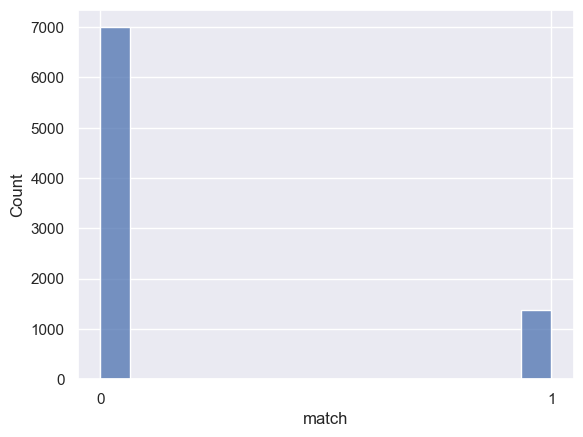

In [608]:
sns.histplot(data=data, x='match')
plt.xticks([0, 1], ['0', '1'])
data_imputed['match'].value_counts()
# Really unbalanced match countö only %16 people had match

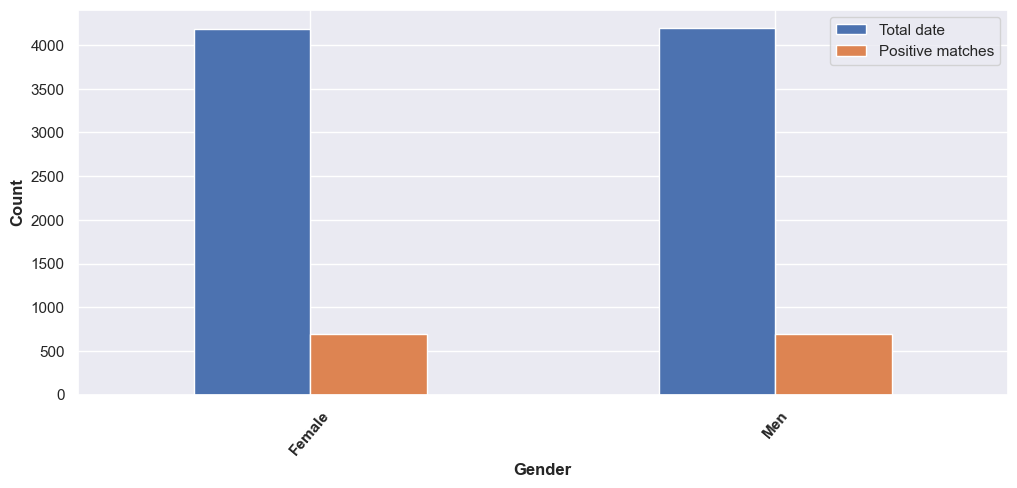

In [609]:
gender_df = data_imputed.groupby('gender').agg({'match': ['count', 'sum']})
gender_df.columns = ['total_date','positive_match']
gender_df = gender_df.reset_index()

figsize=(10,6)
fig, ax = plt.subplots()
gender_df.plot.bar(y=['total_date', 'positive_match'], rot=50, ax=ax)
ax.set_xlabel('Gender',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
ax.legend(['Total date', 'Positive matches'])
ax.set_xticklabels(['Female', 'Men'], fontweight='bold')
sns.set(font_scale=1)
fig.set_size_inches(12, 5)
plt.show();

# Balanced gender and match count

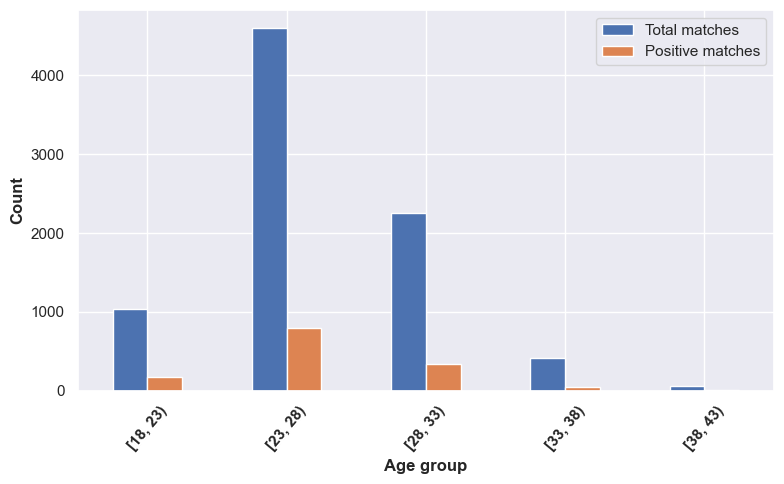

In [837]:
#Oyku's graph
age_df = data_imputed.groupby('age').agg({'match': ['count', 'sum']})
age_df.columns = ['total_match','positive_match']
age_df = age_df.reset_index()
age_df['age_group'] = pd.cut(age_df['age'], bins=np.arange(18, 44, 5), right=False)

age_group_df = age_df.groupby('age_group').sum()

fig, ax = plt.subplots()
age_group_df.plot.bar(y=['total_match', 'positive_match'], rot=50, ax=ax)
ax.set_xlabel('Age group',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
ax.legend(['Total matches', 'Positive matches'])
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
sns.set(font_scale=1)

# Adjust layout
fig.set_size_inches(8, 5)
plt.tight_layout()
plt.show();

<AxesSubplot:xlabel='age', ylabel='Count'>

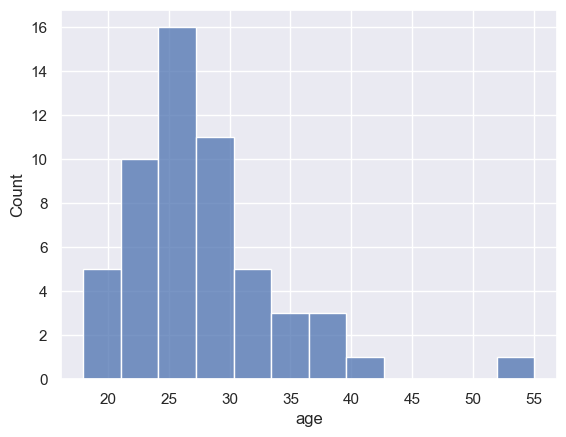

In [841]:
sns.histplot(data= age_df, x='age')

<AxesSubplot:xlabel='age', ylabel='positive_match'>

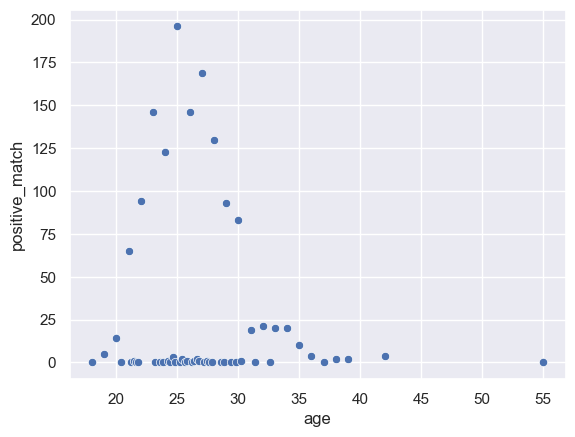

In [636]:
sns.scatterplot(data = age_df, x = 'age', y = 'positive_match')

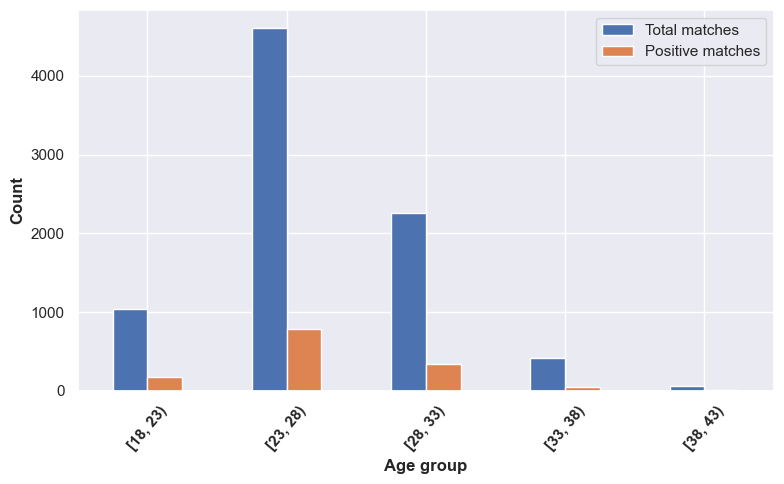

In [649]:
#Oyku's graph
age_o_df = data_imputed.groupby('age_o').agg({'match': ['count', 'sum']})
age_o_df.columns = ['total_match','positive_match']
age_o_df = age_o_df.reset_index()
age_o_df['age_group'] = pd.cut(age_o_df['age_o'], bins=np.arange(18, 44, 5), right=False)

age_o_df = age_o_df.groupby('age_group').sum()

fig, ax = plt.subplots()
age_o_df.plot.bar(y=['total_match', 'positive_match'], rot=50, ax=ax)
ax.set_xlabel('Age group',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
ax.legend(['Total matches', 'Positive matches'])
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
sns.set(font_scale=1)

# Adjust layout
fig.set_size_inches(8, 5)
plt.tight_layout()
plt.show();

In [624]:
age_group_df['%'] = (age_group_df['positive_match'] / age_group_df['total_match']) * 100
age_group_df

age  total_match  positive_match          %
age_group                                               
[18, 23)   206.4         1040           179.0  17.211538
[23, 28)   611.6         4595           792.0  17.236126
[28, 33)   360.8         2257           347.0  15.374391
[33, 38)   175.0          423            54.0  12.765957
[38, 43)   119.0           57             8.0  14.035088

In [646]:
data_imputed['age_diff'] = round(abs(data_imputed['age'] - data_imputed['age_o']),0)
age_diff_df = data_imputed.groupby('age_diff').agg({'match': ['count', 'sum']})
age_diff_df.columns = ['total_match','positive_match']
age_diff_df = age_diff_df.reset_index()
age_diff_df['age_group'] = pd.cut(age_diff_df['age_diff'], bins=np.arange(1, 32, 5), right=False)

age_diff_df = age_diff_df.groupby('age_group').sum()
age_diff_df['%'] = (age_diff_df['positive_match'] / age_diff_df['total_match']) * 100

age_diff_df

age_diff  total_match  positive_match          %
age_group                                                  
[1, 6)         15.0         5819          1006.0  17.288194
[6, 11)        40.0         1623           214.0  13.185459
[11, 16)       65.0          183            12.0   6.557377
[16, 21)       90.0           40             6.0  15.000000
[21, 26)       22.0            6             0.0   0.000000
[26, 31)       28.0            2             0.0   0.000000

In [660]:
hobies.describe().T

count      mean       std  min  25%  50%  75%   max
go_out    8378.0  2.159203  1.101753  1.0  1.0  2.0  3.0   7.0
sports    8378.0  6.421079  2.610049  1.0  4.8  7.0  9.0  10.0
tvsports  8378.0  4.573741  2.791292  1.0  2.0  4.0  7.0  10.0
exercise  8378.0  6.250370  2.410851  1.0  5.0  6.6  8.0  10.0
dining    8378.0  7.786894  1.748331  1.0  7.0  8.0  9.0  10.0
museums   8378.0  6.990356  2.045964  0.0  6.0  7.0  8.4  10.0
art       8378.0  6.721365  2.257165  0.0  5.0  7.0  8.0  10.0
hiking    8378.0  5.739866  2.560738  0.0  4.0  6.0  8.0  10.0
gaming    8378.0  3.886512  2.612251  0.0  2.0  3.0  6.0  14.0
clubbing  8378.0  5.749821  2.494501  0.0  4.0  6.0  8.0  10.0
reading   8378.0  7.676009  2.000979  1.0  7.0  8.0  9.0  13.0
tv        8378.0  5.308952  2.520390  1.0  3.0  6.0  7.0  10.0
theater   8378.0  6.782669  2.229456  0.0  5.0  7.0  8.8  10.0
movies    8378.0  7.923371  1.695801  0.0  7.0  8.0  9.0  10.0
concerts  8378.0  6.833087  2.150497  0.0  5.0  7.0  8.0  10.0
music     8378.0  7.856434  1.787085  1.0  7.0  8.0  9.0  10.0
shopping  8378.0  5.640248  2.602337  1.0  4.0  6.0  8.0  10.0
yoga      8378.0  4.352017  2.712163  0.0  2.0  4.0  7.0  10.0

In [662]:
hobies.corr()

go_out    sports  tvsports  exercise    dining   museums  \
go_out    1.000000 -0.126887 -0.012141 -0.082454 -0.124549  0.050684   
sports   -0.126887  1.000000  0.479975  0.395721 -0.064766 -0.125488   
tvsports -0.012141  0.479975  1.000000  0.228326 -0.054657 -0.079920   
exercise -0.082454  0.395721  0.228326  1.000000  0.084944 -0.007301   
dining   -0.124549 -0.064766 -0.054657  0.084944  1.000000  0.386953   
museums   0.050684 -0.125488 -0.079920 -0.007301  0.386953  1.000000   
art       0.042384 -0.126202 -0.098877 -0.014744  0.341927  0.858731   
hiking    0.039806  0.176414 -0.012454  0.069022  0.077635  0.180565   
gaming    0.037262  0.127942  0.253521  0.008006  0.062070 -0.077759   
clubbing -0.039281  0.048890  0.084921  0.016326  0.230870  0.113822   
reading   0.063814 -0.140055 -0.156239  0.007003  0.104607  0.327868   
tv        0.054020 -0.097558  0.255026  0.027172  0.112884  0.027057   
theater   0.044101 -0.252998 -0.088605 -0.013139  0.306382  0.549485   
movies    0.075113 -0.154098 -0.021606 -0.054814  0.232327  0.320157   
concerts  0.007051 -0.016022  0.050603 -0.051574  0.219770  0.380631   
music    -0.019614  0.002160  0.057689  0.003536  0.198461  0.273080   
shopping -0.031437 -0.103792  0.040059  0.085238  0.407416  0.230169   
yoga     -0.024965 -0.031175 -0.064602  0.112848  0.175844  0.262909   

               art    hiking    gaming  clubbing   reading        tv  \
go_out    0.042384  0.039806  0.037262 -0.039281  0.063814  0.054020   
sports   -0.126202  0.176414  0.127942  0.048890 -0.140055 -0.097558   
tvsports -0.098877 -0.012454  0.253521  0.084921 -0.156239  0.255026   
exercise -0.014744  0.069022  0.008006  0.016326  0.007003  0.027172   
dining    0.341927  0.077635  0.062070  0.230870  0.104607  0.112884   
museums   0.858731  0.180565 -0.077759  0.113822  0.327868  0.027057   
art       1.000000  0.192837 -0.064562  0.133664  0.238732  0.018652   
hiking    0.192837  1.000000  0.156706  0.013570  0.041877 -0.147609   
gaming   -0.064562  0.156706  1.000000  0.191946 -0.063065  0.199884   
clubbing  0.133664  0.013570  0.191946  1.000000 -0.086310  0.018367   
reading   0.238732  0.041877 -0.063065 -0.086310  1.000000 -0.003012   
tv        0.018652 -0.147609  0.199884  0.018367 -0.003012  1.000000   
theater   0.526638  0.074222 -0.038961  0.123085  0.210405  0.225506   
movies    0.316915  0.016459  0.016614  0.116601  0.109356  0.340818   
concerts  0.406400  0.182841  0.099521  0.125516  0.092180  0.075300   
music     0.294749  0.049045  0.044670  0.124069  0.076367  0.083756   
shopping  0.219124 -0.114224  0.093599  0.196619 -0.022839  0.453188   
yoga      0.305403  0.238287 -0.011179  0.074217  0.068381  0.028687   

           theater    movies  concerts     music  shopping      yoga  
go_out    0.044101  0.075113  0.007051 -0.019614 -0.031437 -0.024965  
sports   -0.252998 -0.154098 -0.016022  0.002160 -0.103792 -0.031175  
tvsports -0.088605 -0.021606  0.050603  0.057689  0.040059 -0.064602  
exercise -0.013139 -0.054814 -0.051574  0.003536  0.085238  0.112848  
dining    0.306382  0.232327  0.219770  0.198461  0.407416  0.175844  
museums   0.549485  0.320157  0.380631  0.273080  0.230169  0.262909  
art       0.526638  0.316915  0.406400  0.294749  0.219124  0.305403  
hiking    0.074222  0.016459  0.182841  0.049045 -0.114224  0.238287  
gaming   -0.038961  0.016614  0.099521  0.044670  0.093599 -0.011179  
clubbing  0.123085  0.116601  0.125516  0.124069  0.196619  0.074217  
reading   0.210405  0.109356  0.092180  0.076367 -0.022839  0.068381  
tv        0.225506  0.340818  0.075300  0.083756  0.453188  0.028687  
theater   1.000000  0.518249  0.413776  0.256831  0.302309  0.258748  
movies    0.518249  1.000000  0.392620  0.329626  0.258578  0.134996  
concerts  0.413776  0.392620  1.000000  0.656566  0.206813  0.263301  
music     0.256831  0.329626  0.656566  1.000000  0.209383  0.179977  
shopping  0.302309  0.258578  0.206813  0.209383  1.000000  0.19586

- Sports is correlated with tv sports, exercises and in smaller amount gaming
- Tv sports is more correlated with gaming, people who tend to spend time in the home might interested with boths
- Dining is correleted with museums, theater, art etc. art related hobbies
- Tv and shopping highly correlated

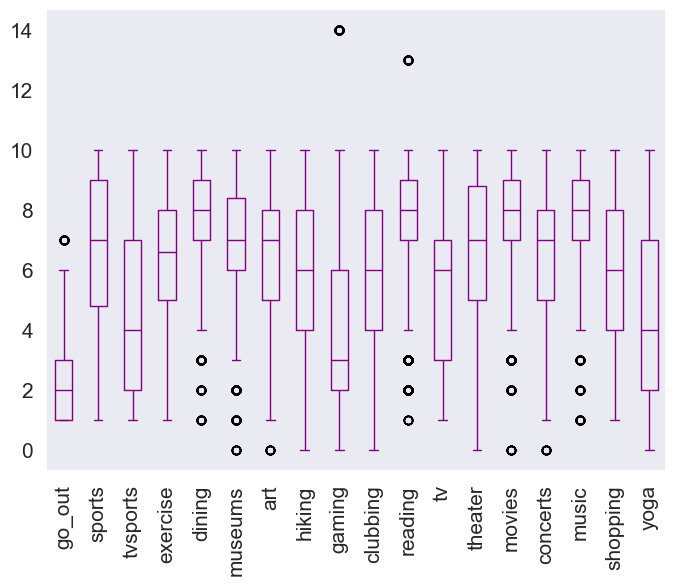

In [821]:
cols = ['go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
plt.figure(figsize=(8,6))
boxplot = hobies.boxplot(column=cols,
grid=False, rot=90, fontsize=15, color='purple')  

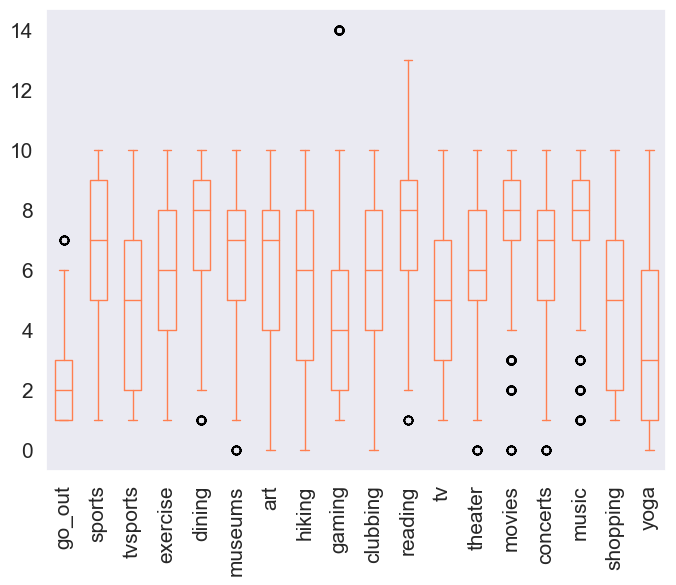

In [822]:
cols = ['go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
plt.figure(figsize=(8,6))
boxplot = hobies[hobies['gender'] == 1].boxplot(column=cols,
grid=False, rot=90, fontsize=15, color='coral')  

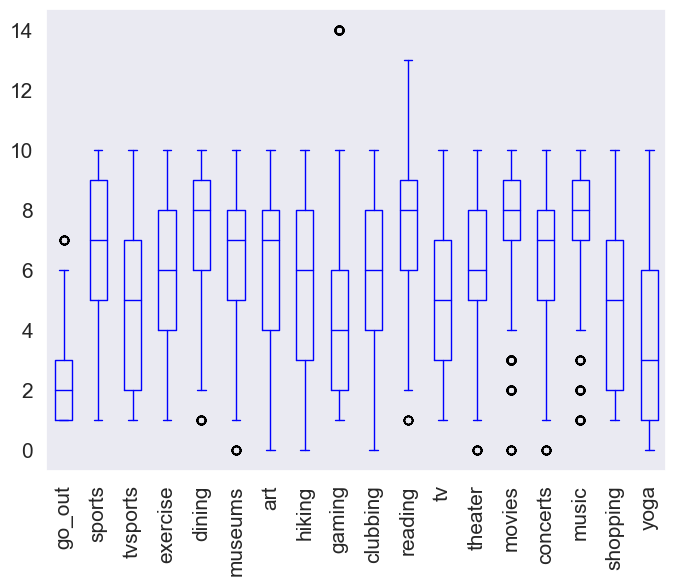

In [823]:
cols = ['go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
plt.figure(figsize=(8,6))
boxplot = hobies[hobies['gender'] == 1].boxplot(column=cols,
grid=False, rot=90, fontsize=15, color='blue') 

In [713]:
hobies_by_gender = hobies.groupby('gender')[hobies.columns[:-2]].mean().T
hobies_by_gender.rename(columns={1:'Male', 0:'Female'}, inplace=True)
hobies_by_gender

gender      Female      Male
go_out    2.140822  2.177539
sports    5.813289  7.027420
tvsports  4.165822  4.980687
exercise  6.454541  6.046686
dining    8.148901  7.425751
museums   7.428824  6.552933
art       7.220076  6.223844
hiking    5.945124  5.535098
gaming    3.320172  4.451502
clubbing  5.907935  5.592084
reading   7.897992  7.454554
tv        5.745889  4.873057
theater   7.486233  6.080782
movies    8.199713  7.647687
concerts  7.111520  6.555317
music     7.997562  7.715641
shopping  6.506597  4.775966
yoga      5.005688  3.699905

In [728]:
race_rel['race'] = round(race_rel['race'],0)
race_rel['race'].unique()
race_rel['race_exp'] = race_rel['race'].map({1:'Black/African American',2:'European/Caucasian-American',3:'Latino/Hispanic American',4:'Asian/Pacific Islander/Asian-American',5:'Native American',6:'Other'})
race_rel['race_o_exp'] = race_rel['race_o'].map({1:'Black/African American',2:'European/Caucasian-American',3:'Latino/Hispanic American',4:'Asian/Pacific Islander/Asian-American',5:'Native American',6:'Other'})

In [729]:
race_rel.head()

samerace  race_o  race  imprace  imprelig  match  gender  \
0       0.0     2.0   4.0      2.0       4.0    0.0     0.0   
1       0.0     2.0   4.0      2.0       4.0    0.0     0.0   
2       1.0     4.0   4.0      2.0       4.0    1.0     0.0   
3       0.0     2.0   4.0      2.0       4.0    1.0     0.0   
4       0.0     3.0   4.0      2.0       4.0    1.0     0.0   

                                race_exp  \
0  Asian/Pacific Islander/Asian-American   
1  Asian/Pacific Islander/Asian-American   
2  Asian/Pacific Islander/Asian-American   
3  Asian/Pacific Islander/Asian-American   
4  Asian/Pacific Islander/Asian-American   

                              race_o_exp  
0            European/Caucasian-American  
1            European/Caucasian-American  
2  Asian/Pacific Islander/Asian-American  
3            European/Caucasian-American  
4               Latino/Hispanic American

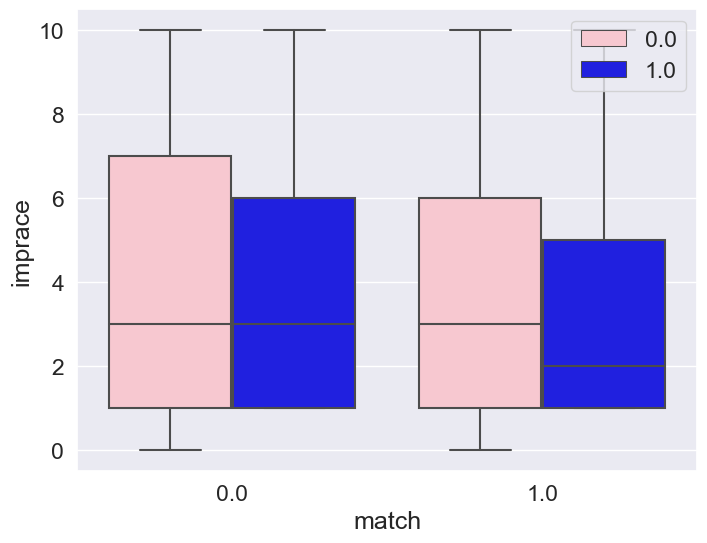

In [795]:
plt.figure(figsize=(8,6))
sns.boxplot(data=race_rel, x='match',y='imprace', hue='gender', palette=['pink', 'blue'])
plt.legend(loc='upper right')#, labels=['F','M'])
plt.show()

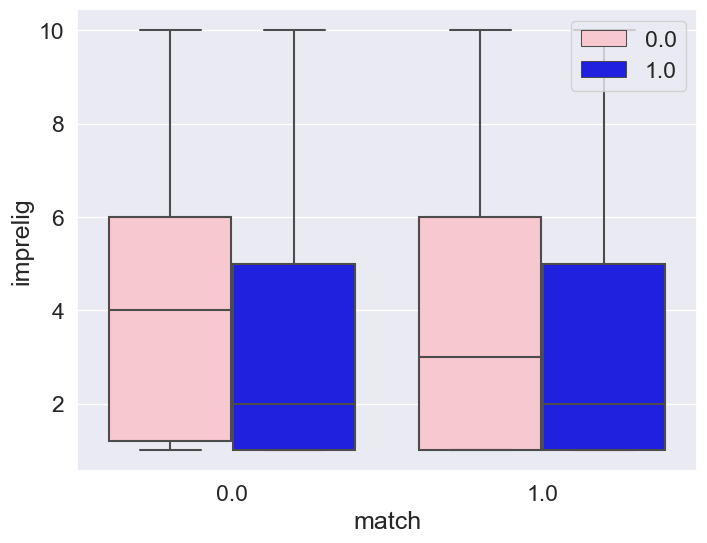

In [796]:
plt.figure(figsize=(8,6))
sns.boxplot(data=race_rel, x='match',y='imprelig', hue='gender', palette=['pink', 'blue'])
plt.legend(loc='upper right')#, labels=['F','M'])
plt.show()

For women religions looks more important

In [767]:
race_exp_match = race_rel.groupby('race_exp').agg({'match':['count','sum']})
race_exp_match.columns = ['total_date','positive_match']
race_exp_match = race_exp_match.reset_index()
race_exp_match['%'] = (race_exp_match['positive_match'] / race_exp_match['total_date']) * 100
race_exp_match.sort_values(by='total_date', ascending=False)

race_exp  total_date  positive_match  \
2            European/Caucasian-American        4741           793.0   
0  Asian/Pacific Islander/Asian-American        1990           269.0   
3               Latino/Hispanic American         701           130.0   
5                                  Other         522           103.0   
1                 Black/African American         423            85.0   
4                        Native American           1             0.0   

           %  
2  16.726429  
0  13.517588  
3  18.544936  
5  19.731801  
1  20.094563  
4   0.000000

Asian/Pacific Islander/Asian-American match % lower 

In [802]:
edu_car['field'] = edu_car['field_cd'].map({1:'Law',2:'Math',3:'Social Science, Psychologist',4: 'Medical Science, Pharmaceuticals, and Bio Tech',
5:'Engineering',6:'English/Creative Writing/ Journalism',7:'History/Religion/Philosophy',8:'Business/Econ/Finance',9:'Education, Academia', 
10:'Biological Sciences/Chemistry/Physics',11:'Social Work',12:'Undergrad/undecided',13:'Political Science/International Affairs',
14:'Film',15:'Fine Arts/Arts Administration',16:'Languages',17:'Architecture',18:'Other'})

In [803]:
edu_car.head()

field_cd  mn_sat  zipcode  gender  match field
0       1.0   990.0      0.0     0.0    0.0   Law
1       1.0   990.0      0.0     0.0    0.0   Law
2       1.0   990.0      0.0     0.0    1.0   Law
3       1.0   990.0      0.0     0.0    1.0   Law
4       1.0   990.0      0.0     0.0    1.0   Law

In [807]:
edu_car_match = edu_car.groupby('field').agg({'match':['count','sum']})
edu_car_match.columns = ['total_date','positive_match']
edu_car_match = edu_car_match.reset_index()
edu_car_match['%'] = (edu_car_match['positive_match'] / edu_car_match['total_date']) * 100
edu_car_match.sort_values(by='total_date', ascending=False)

field  total_date  \
2                            Business/Econ/Finance        1925   
1            Biological Sciences/Chemistry/Physics         993   
4                                      Engineering         864   
14         Political Science/International Affairs         709   
15                    Social Science, Psychologist         696   
10                                             Law         665   
3                              Education, Academia         626   
16                                     Social Work         468   
5             English/Creative Writing/ Journalism         325   
8                      History/Religion/Philosophy         241   
11                                            Math         207   
7                    Fine Arts/Arts Administration         187   
12  Medical Science, Pharmaceuticals, and Bio Tech         143   
13                                           Other         134   
6                                             Film         126   
9                                        Languages          40   
17                             Undergrad/undecided          19   
0                                     Architecture          10   

    positive_match          %  
2            338.0  17.558442  
1            161.0  16.213494  
4            117.0  13.541667  
14           119.0  16.784203  
15           128.0  18.390805  
10           136.0  20.451128  
3             95.0  15.175719  
16            50.0  10.683761  
5             48.0  14.769231  
8             40.0  16.597510  
11            21.0  10.144928  
7             22.0  11.764706  
12            46.0  32.167832  
13            22.0  16.417910  
6             23.0  18.253968  
9             12.0  30.000000  
17             1.0   5.263158  
0              1.0  10.000000

In [809]:
edu_car_match.describe()

total_date  positive_match          %
count    18.000000       18.000000  18.000000
mean    465.444444       76.666667  16.343248
std     477.540540       82.862040   6.550740
min      10.000000        1.000000   5.263158
25%     136.250000       22.000000  12.208946
50%     283.000000       47.000000  16.315702
75%     688.250000      118.500000  18.080087
max    1925.000000      338.000000  32.167832

In [812]:
edu_car_match_f = edu_car[edu_car['gender'] == 0].groupby('field').agg({'match':['count','sum']})
edu_car_match_f.columns = ['total_date','positive_match']
edu_car_match_f = edu_car_match_f.reset_index()
edu_car_match_f['%'] = (edu_car_match_f['positive_match'] / edu_car_match_f['total_date']) * 100
edu_car_match_f.sort_values(by='total_date', ascending=False)

field  total_date  \
2                              Education, Academia         553   
14                    Social Science, Psychologist         524   
0            Biological Sciences/Chemistry/Physics         482   
15                                     Social Work         450   
1                            Business/Econ/Finance         423   
13         Political Science/International Affairs         380   
9                                              Law         276   
4             English/Creative Writing/ Journalism         270   
3                                      Engineering         193   
6                    Fine Arts/Arts Administration         158   
7                      History/Religion/Philosophy         133   
11  Medical Science, Pharmaceuticals, and Bio Tech         114   
10                                            Math          82   
12                                           Other          58   
5                                             Film          57   
8                                        Languages          31   

    positive_match          %  
2             85.0  15.370705  
14            95.0  18.129771  
0             74.0  15.352697  
15            48.0  10.666667  
1             84.0  19.858156  
13            71.0  18.684211  
9             55.0  19.927536  
4             40.0  14.814815  
3             25.0  12.953368  
6             19.0  12.025316  
7             21.0  15.789474  
11            38.0  33.333333  
10             9.0  10.975610  
12             9.0  15.517241  
5              8.0  14.035088  
8              9.0  29.032258

In [813]:
edu_car_match_m = edu_car[edu_car['gender'] == 1].groupby('field').agg({'match':['count','sum']})
edu_car_match_m.columns = ['total_date','positive_match']
edu_car_match_m = edu_car_match_m.reset_index()
edu_car_match_m['%'] = (edu_car_match_m['positive_match'] / edu_car_match_m['total_date']) * 100
edu_car_match_m.sort_values(by='total_date', ascending=False)

field  total_date  \
2                            Business/Econ/Finance        1502   
4                                      Engineering         671   
1            Biological Sciences/Chemistry/Physics         511   
10                                             Law         389   
14         Political Science/International Affairs         329   
15                    Social Science, Psychologist         172   
11                                            Math         125   
8                      History/Religion/Philosophy         108   
13                                           Other          76   
3                              Education, Academia          73   
6                                             Film          69   
5             English/Creative Writing/ Journalism          55   
7                    Fine Arts/Arts Administration          29   
12  Medical Science, Pharmaceuticals, and Bio Tech          29   
17                             Undergrad/undecided          19   
16                                     Social Work          18   
0                                     Architecture          10   
9                                        Languages           9   

    positive_match          %  
2            254.0  16.910786  
4             92.0  13.710879  
1             87.0  17.025440  
10            81.0  20.822622  
14            48.0  14.589666  
15            33.0  19.186047  
11            12.0   9.600000  
8             19.0  17.592593  
13            13.0  17.105263  
3             10.0  13.698630  
6             15.0  21.739130  
5              8.0  14.545455  
7              3.0  10.344828  
12             8.0  27.586207  
17             1.0   5.263158  
16             2.0  11.111111  
0              1.0  10.000000  
9              3.0  33.333333

In [843]:
history.head()

goal  date  go_out  exphappy  match  gender
0   2.0   7.0     1.0       3.0    0.0     0.0
1   2.0   7.0     1.0       3.0    0.0     0.0
2   2.0   7.0     1.0       3.0    1.0     0.0
3   2.0   7.0     1.0       3.0    1.0     0.0
4   2.0   7.0     1.0       3.0    1.0     0.0

In [847]:
history_f = history[history['gender'] == 0]
history_f.describe()

goal         date       go_out     exphappy        match  gender
count  4184.000000  4184.000000  4184.000000  4184.000000  4184.000000  4184.0
mean      2.083843     5.152055     2.140822     5.159512     0.164914     0.0
std       1.374633     1.441334     1.050500     1.728521     0.371147     0.0
min       1.000000     1.000000     1.000000     1.000000     0.000000     0.0
25%       1.000000     4.000000     1.000000     4.000000     0.000000     0.0
50%       2.000000     5.000000     2.000000     5.000000     0.000000     0.0
75%       2.000000     6.000000     3.000000     6.000000     0.000000     0.0
max       6.000000     7.000000     7.000000    10.000000     1.000000     0.0

In [846]:
history_m = history[history['gender'] == 1]
history_m.describe()

goal         date       go_out     exphappy        match  gender
count  4194.000000  4194.000000  4194.000000  4194.000000  4194.000000  4194.0
mean      2.155079     4.861040     2.177539     5.897234     0.164521     1.0
std       1.428337     1.422095     1.150444     1.646132     0.370792     0.0
min       1.000000     1.000000     1.000000     1.000000     0.000000     1.0
25%       1.000000     4.000000     1.000000     5.000000     0.000000     1.0
50%       2.000000     5.000000     2.000000     6.000000     0.000000     1.0
75%       3.000000     6.000000     3.000000     7.000000     0.000000     1.0
max       6.000000     7.000000     7.000000    10.000000     1.000000     1.0

In [850]:
preferences.head()

attr1_1   sinc1_1  intel1_1  fun1_1    amb1_1  shar1_1  match  gender
0     0.15  0.333333       0.4     0.3  0.283019      0.5    0.0     0.0
1     0.15  0.333333       0.4     0.3  0.283019      0.5    0.0     0.0
2     0.15  0.333333       0.4     0.3  0.283019      0.5    1.0     0.0
3     0.15  0.333333       0.4     0.3  0.283019      0.5    1.0     0.0
4     0.15  0.333333       0.4     0.3  0.283019      0.5    1.0     0.0